In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams.update({'font.size': 14})

# Numerical Integration
Some functions cannot be integrated analytically. Instead we can ask a computer to numerically integrate them. If you take the Numerical Methods mathematics course, you will learn more of the nitty-gritty behind this method. Here, we will simply put the method to use. To begin, let's integrate a function that IS integrable analytically so that we know the method works. We will start with a quadratic equation.

$$y = ax^2 + b$$

In [2]:
def quadraticf(x, a, b):
    return a*x**2 + b

a = 2
b = 1

With our function defined along with constants, we can use `scipy.integrate.quad` to numerically integrate the function over a given range. We imported `quad` above. So, we can call it directly, for example

```python
quad(function, start, end, args=(a,b))
```

where `start` is the lower limit of integration and `end` is the upper limit. `a` and `b` are constants in the function. Notice, we could change these to get a differently scaled function and thus a different value of integration.

$$\int_{start}^{end} \left(ax^2+b\right) dx$$

In [3]:
I = quad(quadraticf, 0, 1, args=(a,b))
print(I)

(1.6666666666666667, 1.8503717077085944e-14)


The result of `quad` is a "tuple" of the integrated value and the estimated error of that value. If we integrated analytically, we get

$$\int_0^1 ax^2+b = \left(\frac{ax^3}{3} + bx\right)\Biggr|_{0}^{1}$$

and this evaluated over the range of integration is

$$\frac{a}{3}+b - \frac{0}{3}-0 = \frac{a}{3}+b$$

Is this what the numerical integration gave us?

## Back to our current carrying loop
Okay, let's apply it to our problem of the magentic field of a loop in the plane of the loop. In this case, we are trying to integrate over the loop and calculate the magnetic field at some position away from the loop and in the plane of the loop. We worked through the mathematics to obtain

$$\left|\vec{B}\left(\vec{r}\right)\right|=\frac{\mu_o IR^2}{4\pi}\int_0^{2\pi} \frac{\frac{x}{R}\cos\theta-1}{\left(x^2+R^2-2Rx\cos\theta\right)^{3/2}}d\theta$$

We will parametrize the problem by defining $d=x/R$ such that $d<1$ is inside the loop and $d>1$ is outside the loop. At $d=1$ we expect the field to diverge (<strong>why?</strong>). This parameterization gives

$$\left|\vec{B}\left(\vec{r}\right)\right|=\frac{\mu_o IR^2}{4\pi x^3}\int_0^{2\pi} \left(d\cos\theta-1\right)\left(1+\frac{1}{d^2}-\frac{2}{d}\cos\theta\right)^{-3/2}d\theta$$

You should verify this if you haven't already. We will parametrize the constant outside of the integral by saying there is a maximum field that is at the center of the loop.

$$B_{\circ} = \frac{\mu_o I}{2R}$$

The magnetic field can be normalized such that we have a function of $d$ and $\theta$

$$f(d) = \frac{B}{B_{\circ}} = \frac{1}{2\pi d^3}\int_0^{2\pi} \left(d\cos\theta-1\right)\left(1+\frac{1}{d^2}-\frac{2}{d}\cos\theta\right)^{-3/2}d\theta$$

This is something we can easily enter as a computable function like the quadratic above. As we did with `a` and `b`, we enter a value of `d` for computing the integral at a particular location relative to the loop. To deal with the direction, we can either enter a minus sign out front. We'll verify that is the right thing to do later.

$$f(d) = \frac{B}{B_{\circ}} = -\frac{1}{2\pi d^3}\int_0^{2\pi} \left(d\cos\theta-1\right)\left(1+\frac{1}{d^2}-\frac{2}{d}\cos\theta\right)^{-3/2}d\theta$$

In [4]:
#define the function to integrate
def BField(x, d):
    return (-(d*np.cos(x)-1)*(1+1/d**2-2/d*np.cos(x))**(-1.5))/(2*np.pi*d**3)

In [5]:
d = 1.5 #set the position x/R

#integrate over 0 to 2 pi
I = quad(BField, 0, 2*np.pi, args=(d))
print(I)

(-0.28474711893524945, 1.2977604379078105e-11)


We see that we get an integration value. Now, let's extend it over a range of $d=x/R$ to see if the result makes sense.

In [17]:
d = np.linspace(0, 2, 201)#Make a list of d values
d[np.abs(d)==1] = np.inf #if d=1, set d to infinity. We want to avoid the diverging values at the ring
result = np.zeros(len(d)) #create an array to store the B-field
uncert = np.zeros(len(d))
index = 0
#loop through the d values and get the integration (B-field) value for each d
for i in d:
    temp = quad(BField, 0, 2*np.pi, args=(i))
    result[index] = temp[0]#We only want the value, not the error
    uncert[index] = temp[1]#We can store the errors if we want to plot error bars later
    index += 1
#print(result, uncert)

<ipython-input-4-b99af9895156>:3: RuntimeWarning: divide by zero encountered in double_scalars
  return (-(d*np.cos(x)-1)*(1+1/d**2-2/d*np.cos(x))**(-1.5))/(2*np.pi*d**3)
<ipython-input-4-b99af9895156>:3: RuntimeWarning: invalid value encountered in double_scalars
  return (-(d*np.cos(x)-1)*(1+1/d**2-2/d*np.cos(x))**(-1.5))/(2*np.pi*d**3)
<ipython-input-17-89ea2a6560fa>:8: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  temp = quad(BField, 0, 2*np.pi, args=(i))


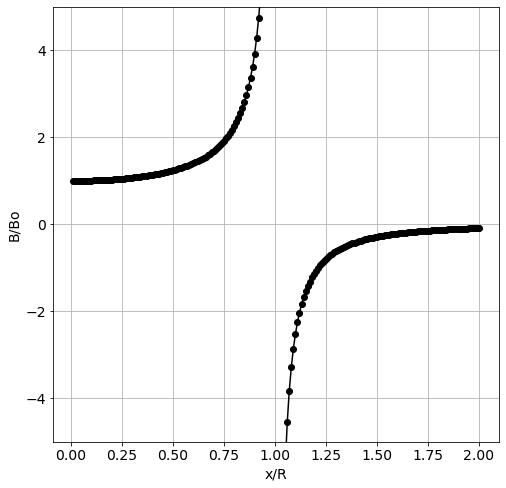

In [18]:
#plt.plot(d, result, '-ok')
plt.errorbar(d, result, yerr=uncert, fmt='-ok')
plt.grid(True)
plt.xlabel('x/R')
plt.ylabel('B/Bo')
plt.ylim(-5,5)
plt.show()

We can compare the approximation at large distances ($x\gg R$). Recall this was integrable and gave us

$$ \left|\vec{B}\left(\vec{r}\right)\right|\approx\frac{\mu_o IR^2}{4\pi x^3} \left(\pi\right)$$

Normalizing and substituting $d=\frac{x}{R}$

$$f_{far}(d)=\frac{B}{B_\circ} \approx \frac{1}{2d^3}$$

<strong>You should verify this equation by filling in the algebra.</strong> Keep in mind this is only valid outside the ring and in the plane of the ring. Below, create an appropriate range of $d$ values (positive only is fine). Use those values to compute the large distance approximation of $B$, i.e., $f_{far}(d)$. Then plot both the numerically integrated and the approximated magnetic fields.

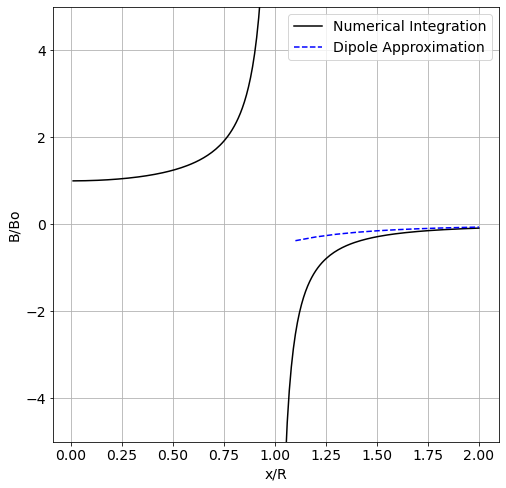

In [19]:
dfar = np.linspace(1.1, 2, 10)#Make a list of d values
ffar = -1/(2*dfar**3)#compute the approximate B field

#Create a plot
plt.plot(d, result, '-k', label='Numerical Integration') #plot f(d)
plt.plot(dfar, ffar, '--b', label='Dipole Approximation') #plot ffar(d)
plt.grid(True)
plt.xlabel('x/R')
plt.ylabel('B/Bo')
plt.legend(loc=0)
plt.ylim(-5,5)#you may need to adjust this
plt.show()